In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
HotelData=pd.read_csv("DS1_C5_S5_Hotel Dataset (1).csv")
HotelData

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


### Task 1
## DATA CLEANING

In [17]:
HotelData.shape

(2097, 32)

In [6]:
HotelData.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              127
company                           2066
days_in_waiting_list     

In [7]:
HotelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           2097 non-null   object  
 1   is_canceled                     2097 non-null   int64   
 2   lead_time                       2097 non-null   int64   
 3   arrival_date_year               2097 non-null   int64   
 4   arrival_date_month              2097 non-null   object  
 5   arrival_date_week_number        2097 non-null   int64   
 6   arrival_date_day_of_month       2097 non-null   int64   
 7   stays_in_weekend_nights         2097 non-null   int64   
 8   stays_in_week_nights            2097 non-null   int64   
 9   adults                          2097 non-null   int64   
 10  children                        2097 non-null   int64   
 11  babies                          2097 non-null   int64   
 12  meal                

### Task 2
## BOOKING PATTERN ANALYSIS

I.

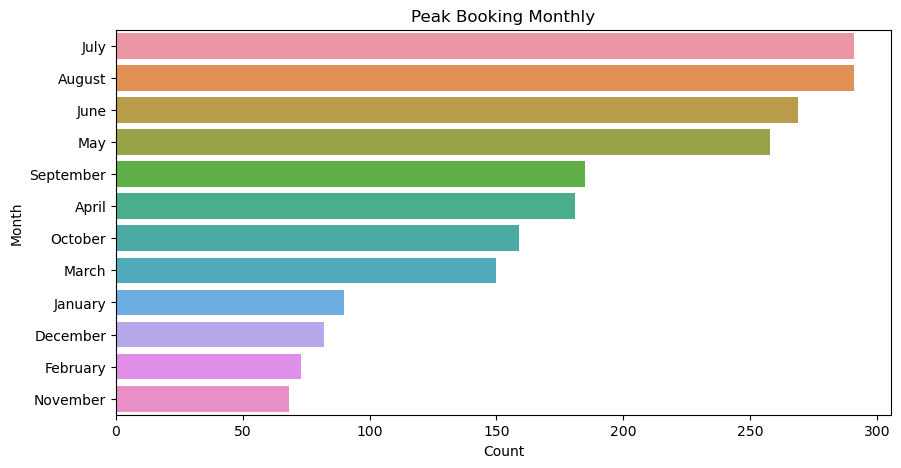

In [3]:
Montly_booking=HotelData['arrival_date_month'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(y=Montly_booking.index,x=Montly_booking.values)
plt.title("Peak Booking Monthly")
plt.xlabel("Count")
plt.ylabel('Month')
plt.show()

Interpretation:
- The peak booking months are July and August
- The month November attains the lowest booking 

In [9]:
HotelData['arrival_date_week_number'].unique()

array([27, 28, 29, 31, 32, 33, 34, 36, 39, 41, 42, 44, 45,  3, 19, 20, 22,
       23, 26, 30, 40, 49, 50, 52,  7,  8, 10, 11, 14, 15, 16, 17, 18, 21,
       24, 25, 35, 37, 38, 43, 46, 48, 53,  1,  2,  4,  6,  9, 13, 47, 51,
        5, 12], dtype=int64)

In [4]:
label=['Week 1','Week 2','Week 3','Week 4','Week 5','Week 6','Week 7']
HotelData['week_category'] = pd.cut(HotelData['arrival_date_week_number'], bins=7, labels=label)

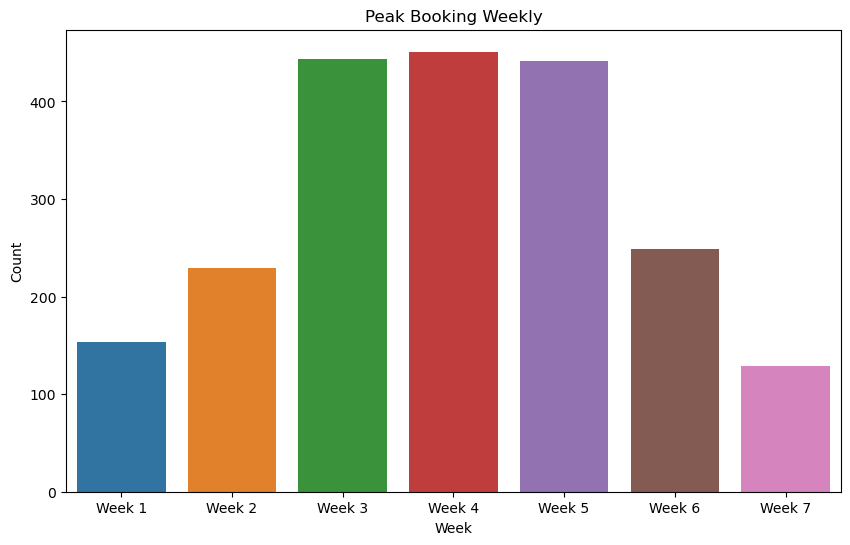

In [5]:
weekly_booking=HotelData['week_category'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=weekly_booking.index,y=weekly_booking.values)
plt.title("Peak Booking Weekly")
plt.xlabel('Week')
plt.ylabel("Count")
plt.show()

Interpretation:
- Week-4 is the peak booking periods for the hotel.
- Followed by week-3 and week-5 attain high booking.


II.

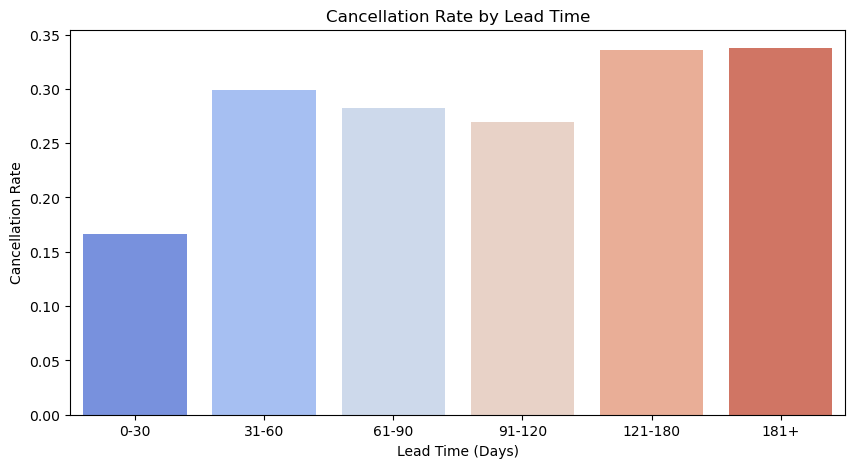

In [19]:
bins = [0, 30, 60, 90, 120, 180, 365]
labels = ['0-30', '31-60', '61-90', '91-120', '121-180', '181+']
HotelData['lead_time_category'] = pd.cut(HotelData['lead_time'], bins=bins, labels=labels)

lead_time_cancel=HotelData.groupby('lead_time_category')[['is_canceled']].mean().reset_index()
lead_time_cancel

plt.figure(figsize=(10, 5))
sns.barplot(x=lead_time_cancel['lead_time_category'], y=lead_time_cancel['is_canceled'], palette="coolwarm")
plt.title("Cancellation Rate by Lead Time")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Cancellation Rate")
plt.show()


Interpretation:
- The lead time between 31-60 Days has more cancellation rate 
- The lead time between 61-120 days slightly has less cancellation rate than the 31-60 Days
- Then the lead time increases the chnage of cancellation rate also increases

### Task 3
## BOOKING CANCELLATION ANALYSIS
I.

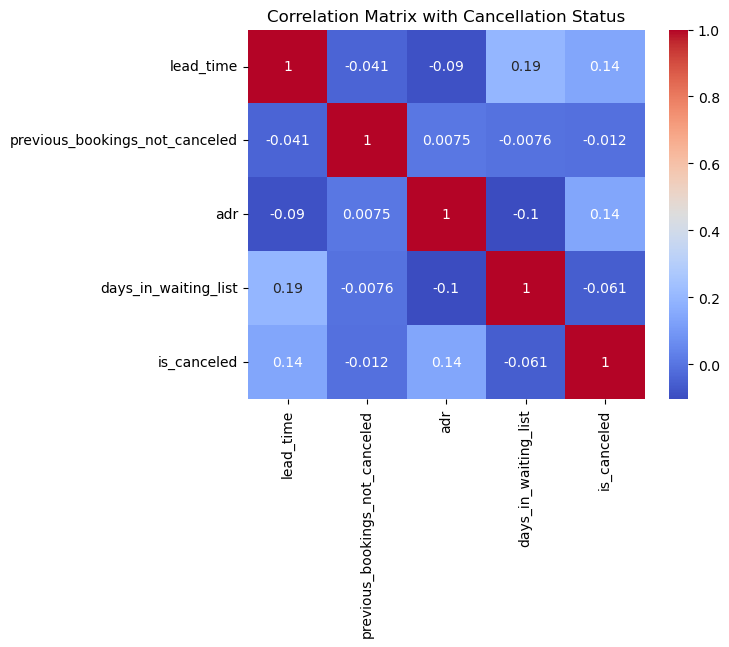

In [10]:
correlation_features=['lead_time','previous_bookings_not_canceled','adr','days_in_waiting_list']
correlartion_matrix=HotelData[correlation_features+['is_canceled']].corr()
sns.heatmap(correlartion_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix with Cancellation Status")
plt.show()

Interpretation:
- There is a strong positive correlation between lead time and days in waiting list
- There is a strong negative correlation between adr and days in waiting list. 
- There is also a moderate positive correlation between lead time and is_canceled.

II.

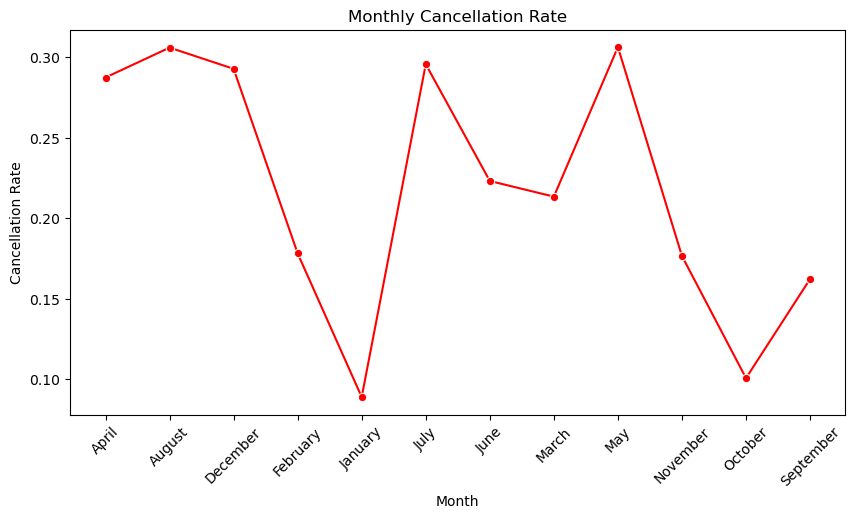

In [70]:
month=HotelData.groupby('arrival_date_month')['is_canceled'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=month.index,y=month.values,marker='o',color='red')
plt.xticks(rotation=45)
plt.title('Monthly Cancellation Rate')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.show()


Interpretation:
- Only in the month of january has the less chance of cancellation
- In the month of August and May has the maximum chance of cancellation.
- Followed by the month April,July and December has the more chance of cancellation

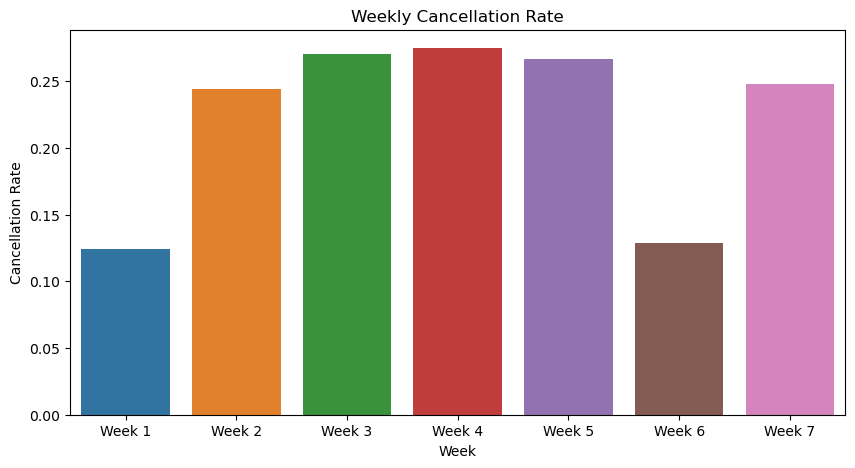

In [11]:
week_cancel=HotelData.groupby('week_category')['is_canceled'].mean()
week_cancel

plt.figure(figsize=(10, 5))
sns.barplot(x=week_cancel.index, y=week_cancel.values)
plt.title('Weekly Cancellation Rate')
plt.xlabel('Week')
plt.ylabel('Cancellation Rate')
plt.show()

Interpretation:
- Week-4 attains the maximum chance of cancellation
- Followed by week-3 and week-5 has more cancellation rate

III.

In [12]:
Total_Cancellation=HotelData[HotelData['is_canceled']==1]
print("Total number of cancellation is",Total_Cancellation.shape[0])

Total number of cancellation is 501


In [13]:
high_risk=HotelData[(HotelData['lead_time']>90)&(HotelData['distribution_channel']=='TA/TO')&(HotelData['deposit_type']=='No Deposit')&(HotelData['customer_type']=='Transient')]
high_risk

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,week_category
6,Resort Hotel,0,98,2015,July,28,6,1,1,2,...,240.0,NaN,0,Transient,87.30,1,1,Check-Out,08-07-2015,Week 4
12,Resort Hotel,0,110,2015,July,31,28,2,8,2,...,6.0,NaN,0,Transient,90.95,0,1,Check-Out,07-08-2015,Week 5
20,Resort Hotel,0,119,2015,September,39,23,0,2,2,...,241.0,NaN,0,Transient,56.98,0,1,Check-Out,25-09-2015,Week 6
22,Resort Hotel,0,130,2015,October,42,16,0,2,2,...,241.0,NaN,0,Transient,98.40,1,0,Check-Out,18-10-2015,Week 6
37,Resort Hotel,1,114,2016,July,30,21,1,3,2,...,240.0,NaN,0,Transient,240.00,0,0,Canceled,29-03-2016,Week 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,City Hotel,0,98,2017,August,35,27,1,0,2,...,423.0,NaN,0,Transient,72.16,0,0,Check-Out,28-08-2017,Week 5
2086,City Hotel,0,101,2017,August,35,27,1,0,2,...,9.0,NaN,0,Transient,166.00,0,2,Check-Out,28-08-2017,Week 5
2087,City Hotel,0,101,2017,August,35,27,1,0,2,...,9.0,NaN,0,Transient,166.00,0,2,Check-Out,28-08-2017,Week 5
2089,City Hotel,0,169,2017,August,34,25,1,2,2,...,9.0,NaN,0,Transient,139.50,0,1,Check-Out,28-08-2017,Week 5


In [14]:
print("The high risk booking that are more likely to be cancelled is",high_risk.shape[0])

The high risk booking that are more likely to be cancelled is 431


In [15]:
high_risk_cancellation=high_risk['is_canceled'].mean()
print("The average cancellation rate based on the certain conditions is",high_risk_cancellation)

The average cancellation rate based on the certain conditions is 0.4408352668213457


### Task 4
## CUSTOMER BEHAVIOTAL SEGMENTATION

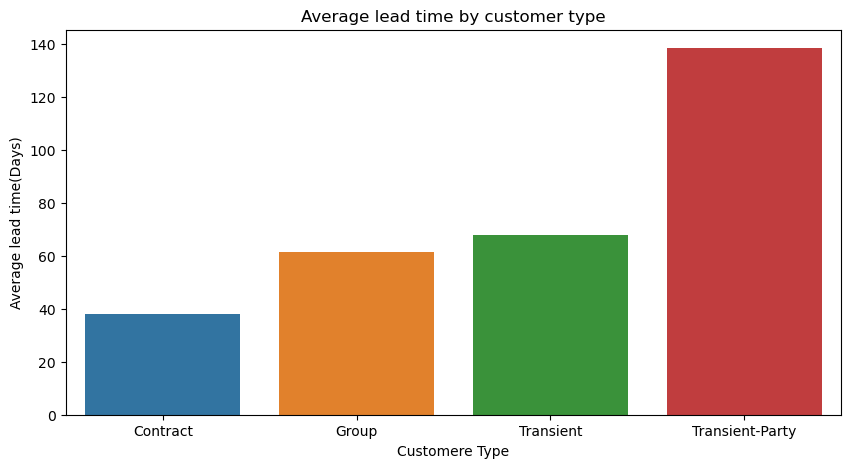

In [19]:
leadtime_by_type=HotelData.groupby('customer_type')['lead_time'].mean()
leadtime_by_type

plt.figure(figsize=(10,5))
sns.barplot(x=leadtime_by_type.index,y=leadtime_by_type.values)
plt.xlabel("Customere Type")
plt.ylabel("Average lead time(Days)")
plt.title("Average lead time by customer type")
plt.show()

Interpretation:
- The contract type customers booking the room 35-40 days before the arriving days
- The customers who are in Transient-partbtgype booking the room 130-140 days before the arriving days

In [41]:
HotelData['market_segment'].unique()

array(['Online TA', 'Offline TA/TO', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation'], dtype=object)

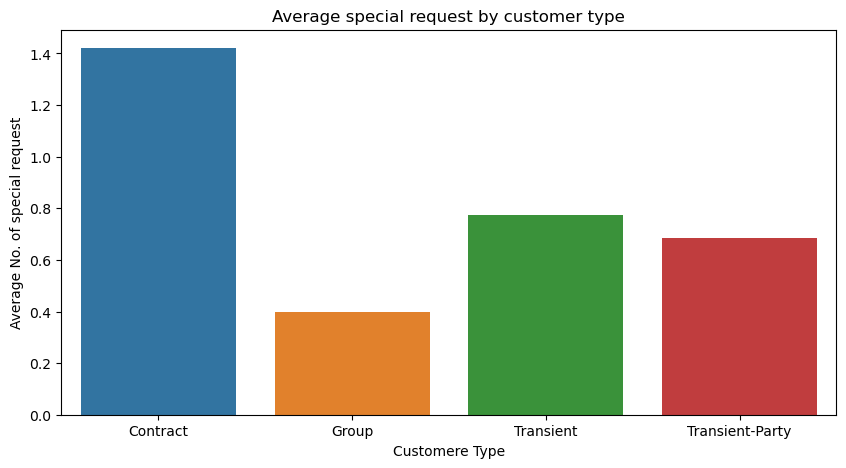

In [20]:
special_req_by_type=HotelData.groupby('customer_type')['total_of_special_requests'].mean()
special_req_by_type

plt.figure(figsize=(10,5))
sns.barplot(x=special_req_by_type.index,y=special_req_by_type.values)
plt.xlabel("Customere Type")
plt.ylabel("Average No. of special request")
plt.title("Average special request by customer type")
plt.show()

Interpretation:
- The contract type customers having maximum number of average special request
- The group customers are requesting very less number of special request

In [21]:
room_preferences=HotelData.groupby('customer_type')[['reserved_room_type','assigned_room_type']].agg(lambda x:x.mode()[0])
print("Common room preferences by customer type:")
room_preferences

Common room preferences by customer type:


,reserved_room_type,assigned_room_type
customer_type,,
Contract,A,A
Group,A,A
Transient,A,A
Transient-Party,A,A


II.

In [22]:
market_segmentation_byType=HotelData.groupby(['customer_type','market_segment']).size()
market_segmentation_byType

customer_type    market_segment
Contract         Offline TA/TO        2
                 Online TA           17
Group            Complementary        1
                 Direct               6
                 Offline TA/TO        1
                 Online TA            7
Transient        Aviation             1
                 Corporate           15
                 Direct             335
                 Offline TA/TO       71
                 Online TA         1355
Transient-Party  Corporate           14
                 Direct              11
                 Groups             132
                 Offline TA/TO       71
                 Online TA           58
dtype: int64

III.

## Task 5
## REVENUE MANAGEMENT

I.

Text(0, 0.5, 'Average Daily Rate')

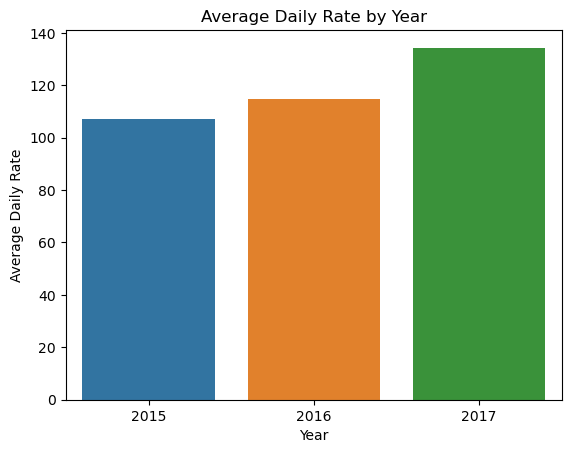

In [23]:
yearly=HotelData.groupby('arrival_date_year')['adr'].mean()
yearly
sns.barplot(x=yearly.index,y=yearly.values)
plt.title("Average Daily Rate by Year")
plt.xlabel("Year")
plt.ylabel('Average Daily Rate')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

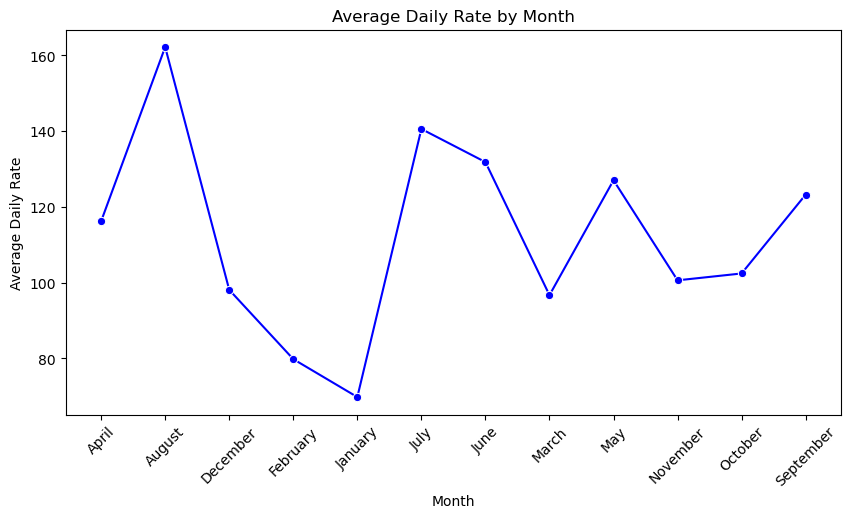

In [24]:
Monthly_adr=HotelData.groupby('arrival_date_month')['adr'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=Monthly_adr.index,y=Monthly_adr.values,marker='o',color='blue')
plt.title("Average Daily Rate by Month")
plt.xlabel("Month")
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)

Interpretation:
- The August month attains the maximum average daily rate around 160-USD
- In the month of january attain very low average dailt rate.

Text(0, 0.5, 'Average Daily Rate')

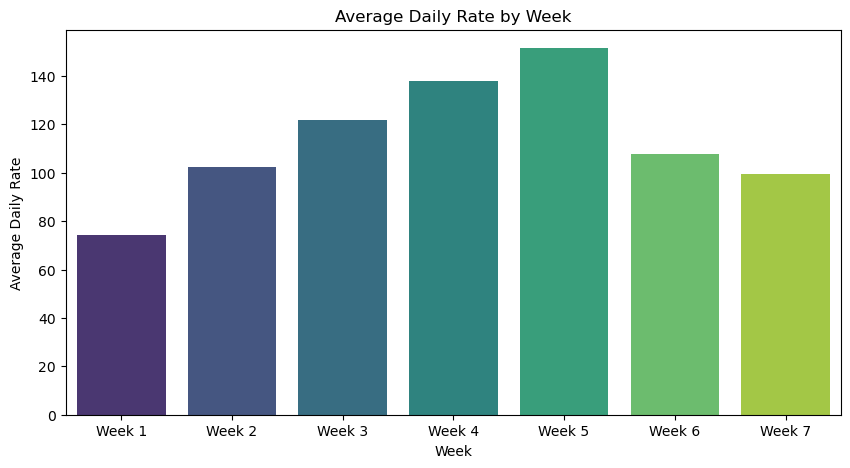

In [25]:
weekly_adr=HotelData.groupby('week_category')['adr'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=weekly_adr.index,y=weekly_adr.values,palette='viridis')
plt.title("Average Daily Rate by Week")
plt.xlabel("Week")
plt.ylabel('Average Daily Rate')


Interpretation:
- The week-5 attains the maximum Average daily rate around 150-USD
- In week-1 the average daily rate is very low around 70-75 USD

II.

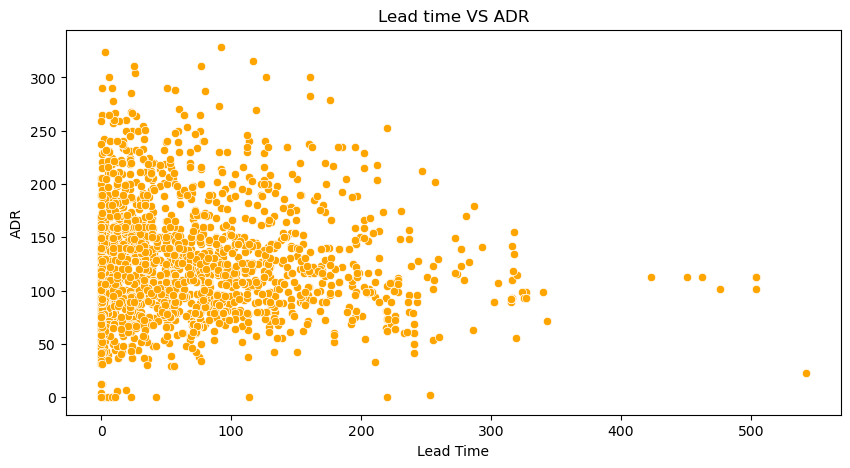

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='lead_time',y='adr',data=HotelData,color='orange')
plt.title("Lead time VS ADR")
plt.xlabel("Lead Time")
plt.ylabel('ADR')
plt.show()

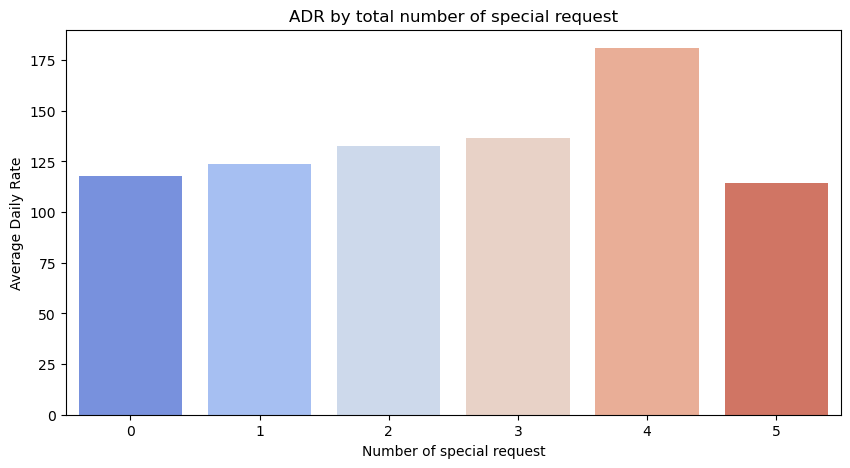

In [27]:
special_requ=HotelData.groupby('total_of_special_requests')['adr'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=special_requ.index,y=special_requ.values,palette='coolwarm')
plt.title("ADR by total number of special request")
plt.xlabel("Number of special request")
plt.ylabel('Average Daily Rate')
plt.show()

Interpretation:
- The Average daily rate is high where the guest has four numbers of special request
- The total number of special request increases then the Average daily rate also increases 

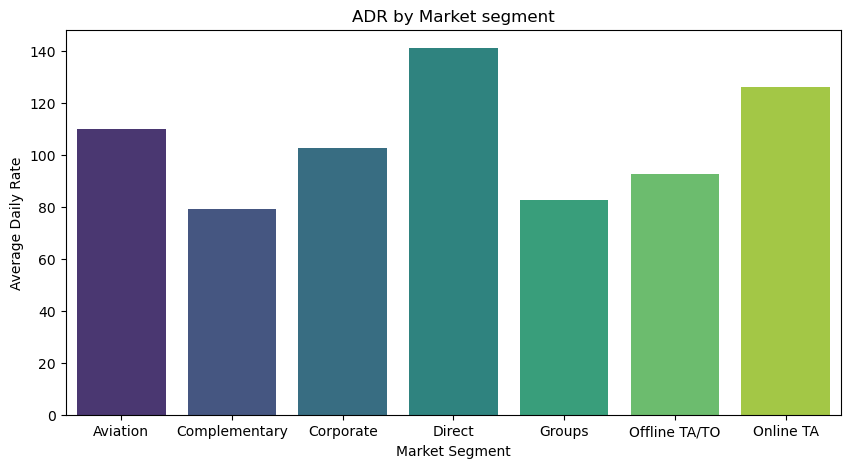

In [28]:
market_segment=HotelData.groupby('market_segment')['adr'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=market_segment.index,y=market_segment.values,palette='viridis')
plt.title("ADR by Market segment")
plt.xlabel("Market Segment")
plt.ylabel('Average Daily Rate')
plt.show()

Interpretation:
- The guests in market segment of Direct type attains the maximum average daily rate around 140-USD.
- The guest in complementary and groups types attain low of 70-80 USD Average daily rate. 

III.

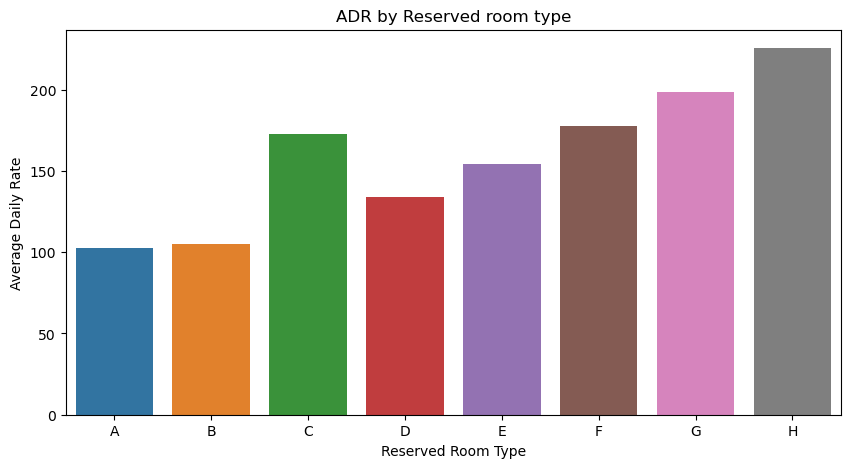

In [29]:
reserved_room=HotelData.groupby('reserved_room_type')['adr'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=reserved_room.index,y=reserved_room.values)
plt.title("ADR by Reserved room type")
plt.xlabel("Reserved Room Type")
plt.ylabel('Average Daily Rate')
plt.show()

Interpretation:
- The reserved room types 'H' attains maximum average ADR around 220-240 USD.
- The type 'A' and 'B' attain low average of 100 USD ADR.

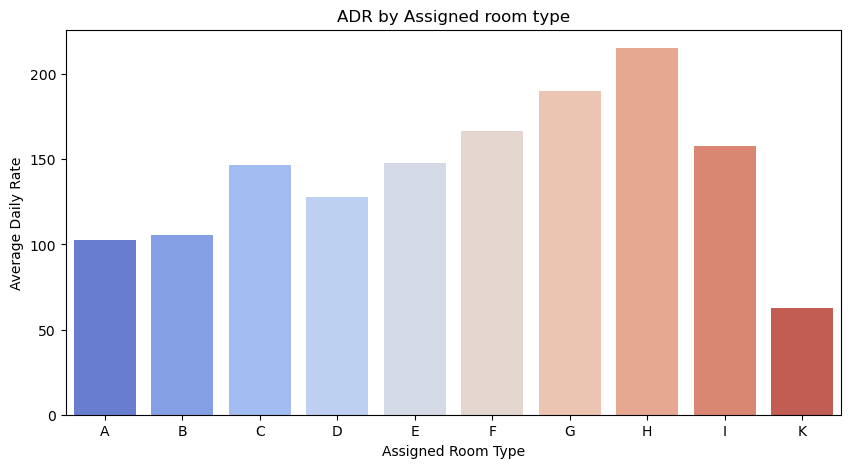

In [31]:
assigned_room=HotelData.groupby('assigned_room_type')['adr'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=assigned_room.index,y=assigned_room.values,palette='coolwarm')
plt.title("ADR by Assigned room type")
plt.xlabel("Assigned Room Type")
plt.ylabel('Average Daily Rate')
plt.show()

Interpretation:
- The assigned room type 'H' attains the maximum average ADR around 210-220 USD. The room 'H' might be Premium Room
- The room 'K' attain low average ADR around 50 USD

### Task 6
## OPERATIONAL EFFICIENCY

I.

In [32]:
channel_effective=HotelData.groupby('distribution_channel').agg(
                  total_booking=('is_canceled','count'),
                  cancell_rate=('is_canceled','mean'),
                  avg_adr=('adr','mean')).sort_values('total_booking', ascending=False)

channel_effective

,total_booking,cancell_rate,avg_adr
distribution_channel,,,
TA/TO,1689,0.263470,119.673801
Direct,351,0.122507,139.988348
Corporate,35,0.000000,103.913143
GDS,22,0.590909,136.946818


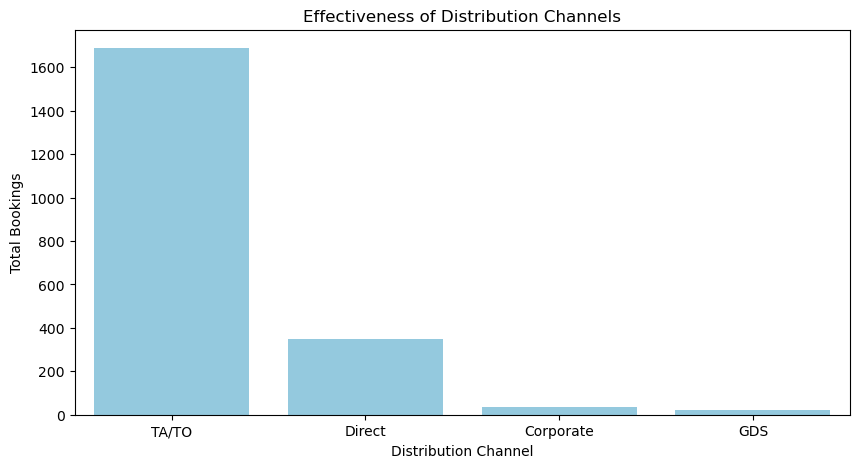

In [33]:
plt.figure(figsize=(10,5))

# Bar plot for total bookings
sns.barplot(x=channel_effective.index, y=channel_effective['total_booking'], color='skyblue')
plt.ylabel('Total Bookings')
plt.xlabel('Distribution Channel')
plt.title('Effectiveness of Distribution Channels')
plt.show()


Interpetation:
- The maximum of customes booking rooms by the Travel Agent or Tour operators.
- Very few customers are booking rooms in the Direct way.

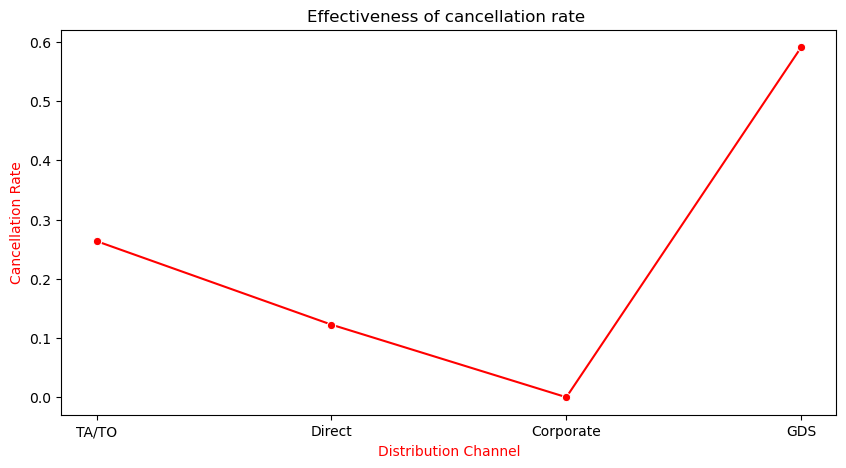

In [34]:
# Line plot for cancellation rate
plt.figure(figsize=(10,5))
sns.lineplot(x=channel_effective.index, y=channel_effective['cancell_rate'], color='red', marker='o')
plt.title('Effectiveness of cancellation rate ')
plt.ylabel('Cancellation Rate', color='red')
plt.xlabel('Distribution Channel', color='red')
plt.show()


Interpretation:
- The booking of hotel by GDS having the maximum chance of possibility for the cancellation.
- The booking done by coporate channel having very less chance of cancellation.


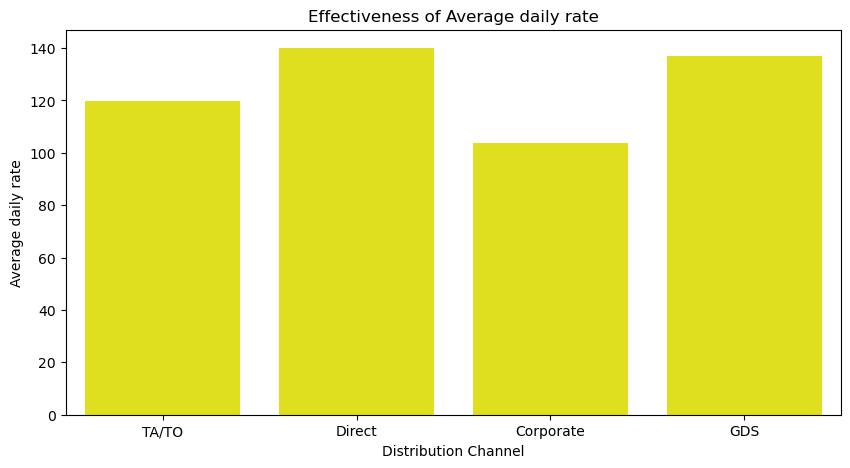

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x=channel_effective.index, y=channel_effective['avg_adr'], color='yellow')
plt.ylabel('Average daily rate')
plt.xlabel('Distribution Channel')
plt.title('Effectiveness of Average daily rate')
plt.show()

Interpretation:
- The hotel booking by Direct and GDS channels has the maximum average ADR of around 130-140 USD.
- The corporate and TA/TO has moderate average ADR around 100-120 USD.

II.

In [22]:
HotelData['booking_changes'].unique()

array([ 0,  1,  2,  3,  5,  4,  6, 14,  8, 11], dtype=int64)

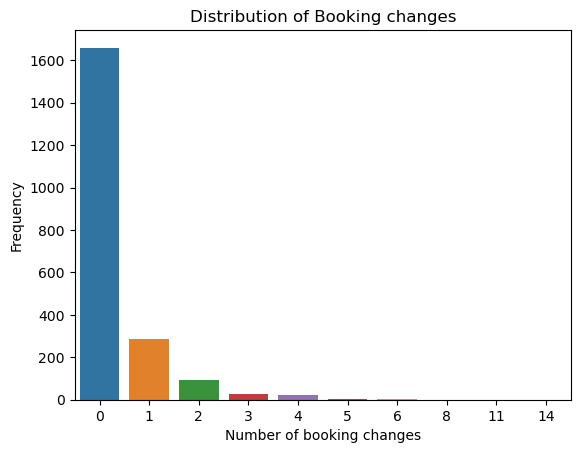

In [26]:
booking_change_distribution=HotelData['booking_changes'].value_counts().sort_index()

sns.barplot(x=booking_change_distribution.index,y=booking_change_distribution.values)
plt.ylabel('Frequency')
plt.xlabel('Number of booking changes')
plt.title('Distribution of Booking changes')
plt.show()

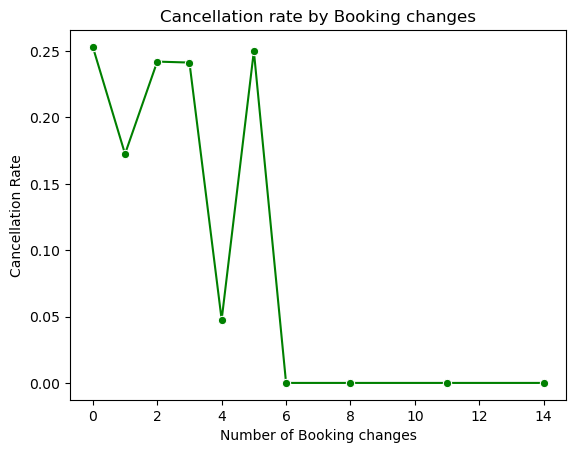

In [29]:
booking_change_cancellation=HotelData.groupby('booking_changes')['is_canceled'].mean()

sns.lineplot(x=booking_change_cancellation.index,y=booking_change_cancellation.values,marker='o',color='green')
plt.ylabel('Cancellation Rate')
plt.xlabel('Number of Booking changes')
plt.title('Cancellation rate by Booking changes')
plt.show()

III.

In [33]:
correlation=HotelData[['days_in_waiting_list','is_canceled']].corr()
correlation

,days_in_waiting_list,is_canceled
days_in_waiting_list,1.000000,-0.060892
is_canceled,-0.060892,1.000000


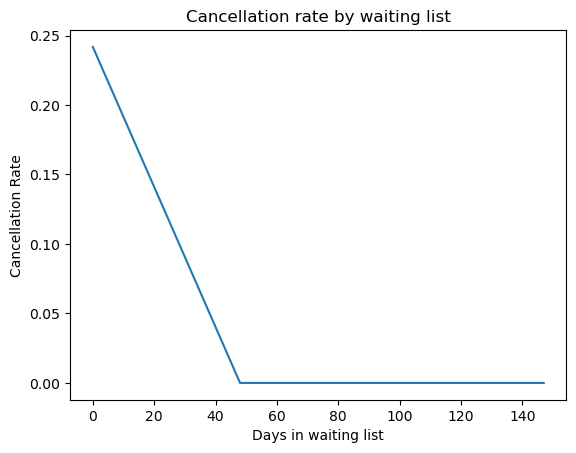

In [37]:
waiting_list_cancell=HotelData.groupby('days_in_waiting_list')['is_canceled'].mean()
sns.lineplot(x=waiting_list_cancell.index,y=waiting_list_cancell.values)
plt.ylabel('Cancellation Rate')
plt.xlabel('Days in waiting list')
plt.title('Cancellation rate by waiting list')
plt.show()

### Task 7
## LOYALTY PROGRAMS AND REPEAT BUSINESS

I.

([<matplotlib.axis.XTick at 0x24d104c7fd0>,
 [Text(0, 0, 'Non-Repeated'), Text(1, 0, 'Repeated')])

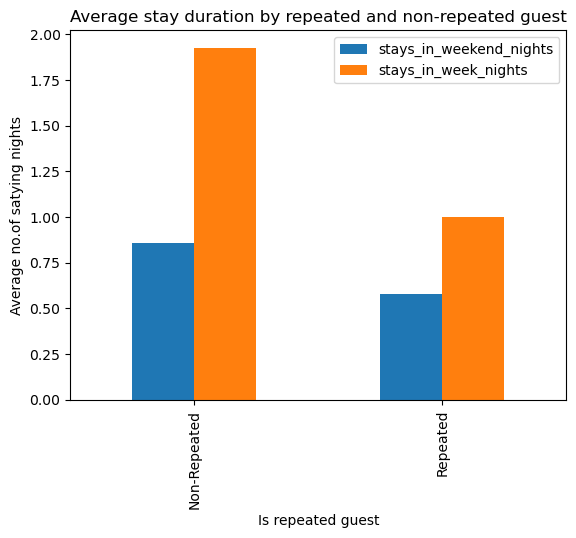

In [49]:
stay=HotelData.groupby('is_repeated_guest')[['stays_in_weekend_nights','stays_in_week_nights']].mean().reset_index()

stay.plot(x='is_repeated_guest',
         kind='bar',
         title='Average stay duration by repeated and non-repeated guest',
         xlabel='Is repeated guest',
         ylabel='Average no.of satying nights')
plt.xticks(ticks=[0,1],labels=['Non-Repeated','Repeated'])


II.

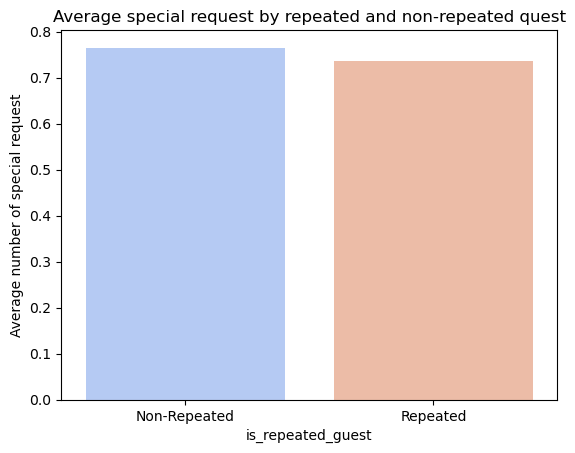

In [57]:
special_request_analysis=HotelData.groupby('is_repeated_guest')['total_of_special_requests'].mean()

sns.barplot(x=special_request_analysis.index,y=special_request_analysis.values,palette='coolwarm')
plt.ylabel('Average number of special request')
plt.xticks(ticks=[0,1],labels=['Non-Repeated','Repeated'])
plt.title('Average special request by repeated and non-repeated quest')
plt.show()

III.

In [16]:
repeat_factor=HotelData.groupby('is_repeated_guest').agg(
                avg_lead_time=('lead_time','mean'),
                avg_adr=('adr','mean'),
                avg_special_req=('total_of_special_requests','mean'))
print("Factors contributing to repeat business:")
repeat_factor  

Factors contributing to repeat business:


,avg_lead_time,avg_adr,avg_special_req
is_repeated_guest,,,
0,77.790183,123.221809,0.765159
1,11.631579,97.885789,0.736842


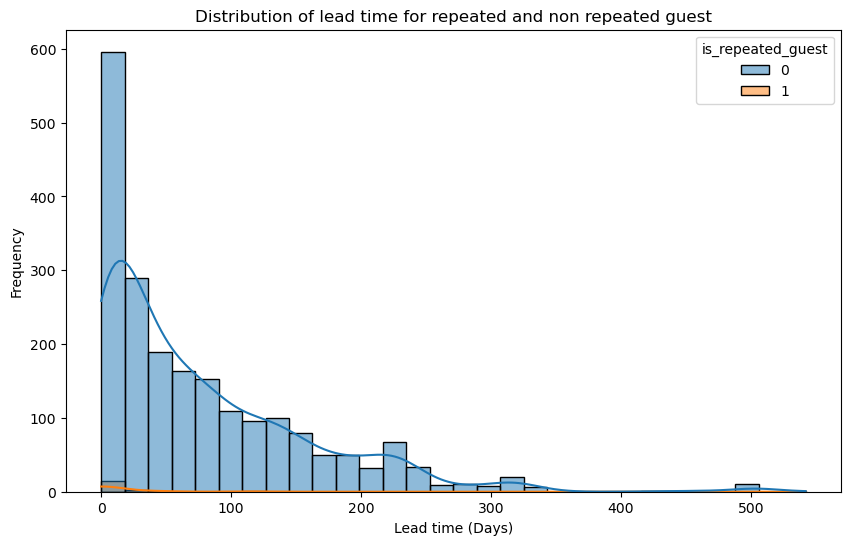

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(x='lead_time',hue='is_repeated_guest',bins=30,kde=True,data=HotelData)
plt.ylabel('Frequency')
plt.xlabel('Lead time (Days)')
plt.title('Distribution of lead time for repeated and non repeated guest')
plt.show()

Interpretation:
- Both repeated and non-repeated guests show a right-skewed distribution. This means that most guests book with a short lead time, and only a few book far in advance.
- For Non-repeated guest the peak of the distribution lies around 0-20 days. This indicates that a large portion of non-repeated guests book with very short notice.
- Repeated guests tend to book with slightly longer lead times, indicating a more planned approach to their bookings.

## CUSTOMER SATISFACTION

In [6]:
special_request_distri=HotelData['total_of_special_requests'].value_counts().sort_index()
special_request_distri

total_of_special_requests
0    925
1    822
2    282
3     57
4      8
5      3
Name: count, dtype: int64

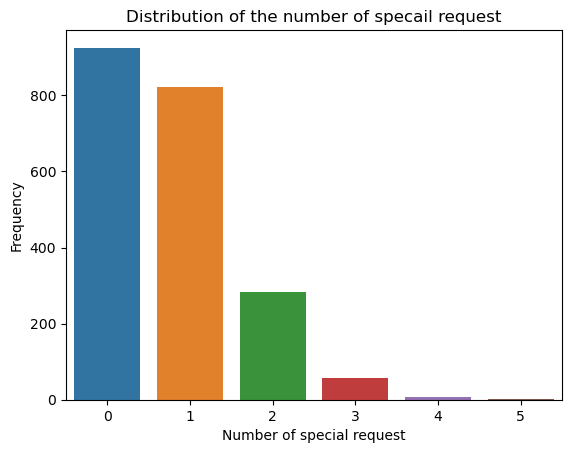

In [9]:
sns.barplot(x=special_request_distri.index,y=special_request_distri.values)
plt.xlabel("Number of special request")
plt.ylabel("Frequency")
plt.title("Distribution of the number of specail request")
plt.show()

In [10]:
adr_by_special_request=HotelData.groupby('total_of_special_requests')['adr'].mean()
adr_by_special_request

total_of_special_requests
0    117.911762
1    123.908747
2    132.642908
3    136.788947
4    180.951250
5    114.500000
Name: adr, dtype: float64

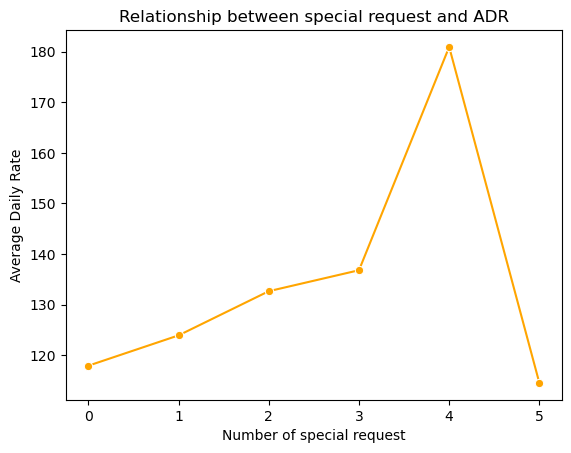

In [11]:
sns.lineplot(x=adr_by_special_request.index,y=adr_by_special_request.values,marker='o',color='orange')
plt.xlabel("Number of special request")
plt.ylabel("Average Daily Rate")
plt.title("Relationship between special request and ADR")
plt.show()

In [12]:
room_preferences=HotelData.groupby(['reserved_room_type','total_of_special_requests']).size()
room_preferences

reserved_room_type  total_of_special_requests
A                   0                            550
                    1                            513
                    2                            130
                    3                             33
                    4                              2
                    5                              1
B                   0                              9
                    1                             14
                    2                              4
                    3                              3
C                   0                              3
                    1                             13
                    2                              7
D                   0                            169
                    1                            148
                    2                             91
                    3                             12
                    4                              3
